  # Capstone AAA Projet                     Martin George mgeorgevienna@gmail.com

### Reading Excel file in to

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('member_sample.csv', index_col = 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.4+ MB


In [6]:
data.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [7]:
nulls = data.isnull().sum()

In [8]:
type(nulls)

pandas.core.series.Series

In [9]:
nulls

Individual Key                   0
Household Key                    0
Member Flag                      0
City                             0
State - Grouped                  0
                             ...  
Tow Destination Latitude      9531
Tow Destination Longitude     9531
Tow Destination Name         17652
Was Duplicated                7347
Was Towed To AAR Referral     7347
Length: 112, dtype: int64

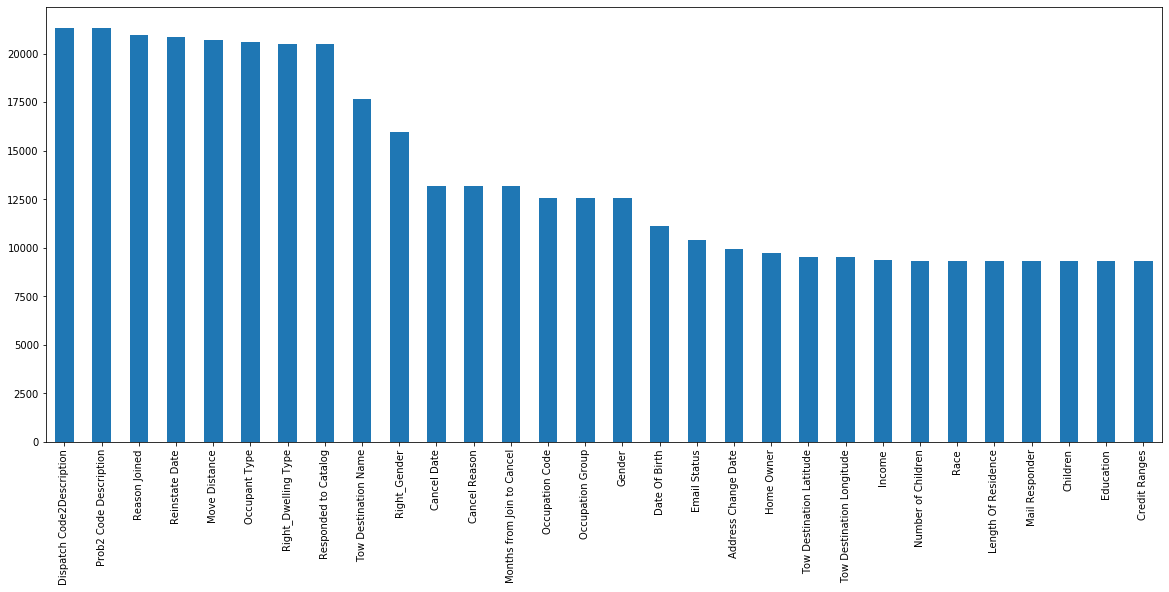

In [10]:
nulls.nlargest(30).plot(kind='bar',figsize =(20,8))


### Loc and iloc

loc vs iloc:
The loc indexer can also do boolean selection. For instance, if we are interested in finding all the rows where Age is less 30 and return just the Color and Height columns we can do the following. We can replicate this with iloc but we cannot pass it a boolean series. We must convert the boolean Series into a numpy array.
loc gets rows (or columns) with particular labels from the index.
iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

### Example

In [11]:
df = pd.DataFrame({'Age': [30, 20, 22, 40, 32, 28, 39],
                   'Color': ['Blue', 'Green', 'Red', 'White', 'Gray', 'Black',
                             'Red'],
                   'Food': ['Steak', 'Lamb', 'Mango', 'Apple', 'Cheese',
                            'Melon', 'Beans'],
                   'Height': [165, 70, 120, 80, 180, 172, 150],
                   'Score': [4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2],
                   'State': ['NY', 'TX', 'FL', 'AL', 'AK', 'TX', 'TX']
                   },
                  index=['Jane', 'Nick', 'Aaron', 'Penelope', 'Dean',
                         'Christina', 'Cornelia'])
print(df)
df.info()
 
print("\n -- loc -- \n")
print(df.loc[df['Age'] < 30, ['Color', 'Height']])
 
print("\n -- iloc -- \n")
print(df.iloc[(df['Age'] < 30).values, [1, 4]])


           Age  Color    Food  Height  Score State
Jane        30   Blue   Steak     165    4.6    NY
Nick        20  Green    Lamb      70    8.3    TX
Aaron       22    Red   Mango     120    9.0    FL
Penelope    40  White   Apple      80    3.3    AL
Dean        32   Gray  Cheese     180    1.8    AK
Christina   28  Black   Melon     172    9.5    TX
Cornelia    39    Red   Beans     150    2.2    TX
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Jane to Cornelia
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     7 non-null      int64  
 1   Color   7 non-null      object 
 2   Food    7 non-null      object 
 3   Height  7 non-null      int64  
 4   Score   7 non-null      float64
 5   State   7 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 392.0+ bytes

 -- loc -- 

           Color  Height
Nick       Green      70
Aaron        Red     120
Christina  Black     172

 -- iloc 

In [12]:
data['Reason Joined'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Reason Joined, dtype: object

In [13]:
data['Reason Joined'].value_counts()

U                      168
Dependable Services    127
5                       45
Family Plan Avail       19
Nation Wide Rd Srv       7
Gift Membership          5
Free Membership          4
Club Reputation          3
3                        3
Other                    1
Prior Family Exp         1
Recommend/Referral       1
Convenient Offices       1
Variety of Services      1
7                        1
Direct Mail              1
Name: Reason Joined, dtype: int64

In [14]:
data.shape

(21344, 112)

In [15]:
data['Reason Joined'].fillna('unknow',inplace=True)

In [16]:
data['Reason Joined'].value_counts()

unknow                 20956
U                        168
Dependable Services      127
5                         45
Family Plan Avail         19
Nation Wide Rd Srv         7
Gift Membership            5
Free Membership            4
3                          3
Club Reputation            3
Other                      1
7                          1
Variety of Services        1
Convenient Offices         1
Recommend/Referral         1
Prior Family Exp           1
Direct Mail                1
Name: Reason Joined, dtype: int64

# 'Reason Joined' has 20956 null values out of 21344 and not a good data for analysis

In [17]:
dependable_service_group = data.loc[data['Reason Joined'] == 'Dependable Services']

In [18]:
everyone_else = data.loc[data['Reason Joined'] != 'Dependable Services']

In [19]:
dependable_service_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 633 to 89877
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 112.1+ KB


In [20]:
everyone_else.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21217 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.3+ MB


In [21]:
data['Dispatch Code1 Description'].value_counts()

Member Requests Battery Service             3804
Flat Tire w/spare                           2410
No Crank - Jump Start                       1192
Key Locked In Passenger Compartment         1036
Other Required Tow (describe)                831
Convenience/Member Concern Tow               744
Tire Issue Requires Tow To Shop              426
Engine Runs Poorly                           408
Brake System Failure                         275
Out Of Gasoline                              263
Need Air In Tire                             233
Engine Stalled While Driving                 225
Engine Overheat                              223
Transmission/Clutch Failure                  219
Member Requests Tow                          189
Known Starter Problem                        187
Collision/Police Tow                         151
No Crank - Bat Svc (non-AAA Bat)             147
Known Alternator Problem                     133
Extrication - Probable GO                    132
Other Runs Won't Mov

In [22]:
data.iloc[17:21]

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
17,2766868.0,11622991.0,Y,WARWICK,RI,2889.0,28892920.0,N,N,N,...,SUBARU,BRZ,AAA SNE RI LIGHT SERVICE,other,53.0,0.0,0.0,NaN,0.0,0.0
18,2766868.0,11622991.0,Y,WARWICK,RI,2889.0,28892920.0,N,N,N,...,SUBARU,BRZ,AAA SNE RI LIGHT SERVICE,other,53.0,0.0,0.0,NaN,0.0,0.0
19,2766868.0,11622991.0,Y,WARWICK,RI,2889.0,28892920.0,N,N,N,...,HYUNDAI,TUCSON,Assured Collision Inc,body shop,29.0,0.0,0.0,NaN,0.0,0.0
20,13746947.0,579810.0,Y,CENTRAL FALLS,RI,2863.0,28631322.0,N,N,N,...,INFINITI,QX56,KING'S SERVICE CENTER,service station,28.0,0.0,0.0,NaN,0.0,0.0


In [23]:
data['Date'] = pd.to_datetime(data['SC Date'])


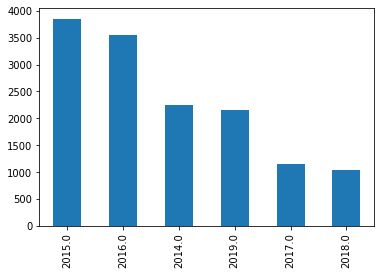

In [24]:
data['Date'].dt.year.value_counts().plot(kind = 'bar')

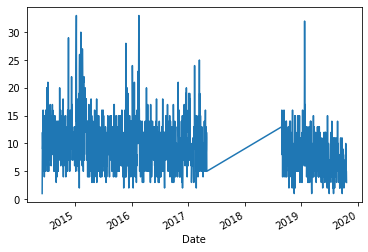

In [25]:
data.groupby('Date').size().plot()

In [26]:
data['Reason Joined'].head()

0    unknow
1    unknow
2    unknow
3    unknow
4    unknow
Name: Reason Joined, dtype: object

In [27]:
data['Reason Joined'].value_counts()

unknow                 20956
U                        168
Dependable Services      127
5                         45
Family Plan Avail         19
Nation Wide Rd Srv         7
Gift Membership            5
Free Membership            4
3                          3
Club Reputation            3
Other                      1
7                          1
Variety of Services        1
Convenient Offices         1
Recommend/Referral         1
Prior Family Exp           1
Direct Mail                1
Name: Reason Joined, dtype: int64

C:\Users\unodc\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\unodc\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0, 160)

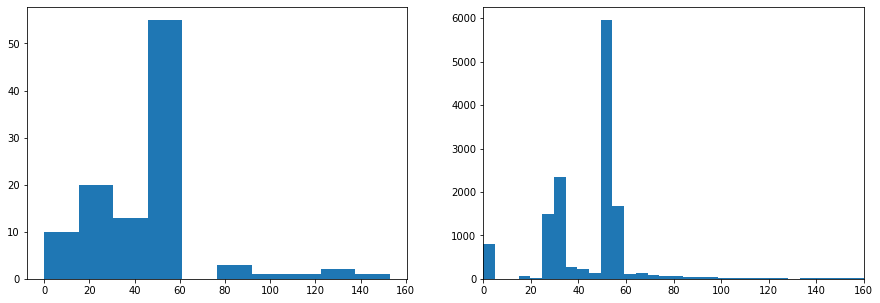

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
ax[0].hist(dependable_service_group['Total Cost']);
ax[1].hist(everyone_else['Total Cost'], bins = 2000);
ax[1].set_xlim(0,160)


In [29]:
data['Income'].value_counts()

100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [30]:
data['Income'].fillna('unknown',inplace=True)


In [31]:
data['Income'].value_counts()

unknown          9401
100-149,999      2577
90-99,999        2400
70-79,999        1000
50-59,999         888
40-49,999         771
10-19,999         688
175 - 199,999     600
30-39,999         553
60-69,999         541
150 - 174,999     438
20-29,999         425
200 - 249,999     424
250K+             397
Under 10K         226
80-89,999          15
Name: Income, dtype: int64

In [32]:
data['Home Owner'].value_counts()

Home Owner             11121
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: Home Owner, dtype: int64

In [33]:
def yes_noer(x):
    if x== 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan
    

'FSV CMSI Flag'  is Engagement with AAA  Financial Service

In [34]:
data['FSV CMSI Flag'] = data['FSV CMSI Flag'].apply(yes_noer)

In [35]:
data['FSV CMSI Flag'].value_counts()

0    20393
1      951
Name: FSV CMSI Flag, dtype: int64

In [36]:
data.groupby(['Home Owner'])['FSV CMSI Flag'].mean()

Home Owner
Home Owner             0.058988
Probable Home Owner    0.000000
Probable Renter        0.000000
Renter                 0.097760
Name: FSV CMSI Flag, dtype: float64

In [37]:
home_owners = data.loc[data['Home Owner'] == 'Home Owner']

In [38]:
home_owners.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral,Date
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0,2017-04-13
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,...,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,2016-07-26
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0,2017-02-13
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,2015-01-29
5,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,...,CAMRY,AAA SNE RI LIGHT SERVICE,mobile battery service,53.0,0.0,0.0,NaN,0.0,0.0,2015-09-25


In [39]:
home_owners['Home Owner'].count()

11121

In [40]:
home_owners['Home Owner'].head()

1    Home Owner
2    Home Owner
3    Home Owner
4    Home Owner
5    Home Owner
Name: Home Owner, dtype: object

In [41]:
data[['Tow Destination Latitude','Tow Destination Longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tow Destination Latitude   11813 non-null  float64
 1   Tow Destination Longitude  11813 non-null  float64
dtypes: float64(2)
memory usage: 500.2 KB


In [130]:
lat_long_0 = data[['Tow Destination Latitude','Tow Destination Longitude']].dropna().iloc[:5000]
lat_long = data[['Tow Destination Latitude','Tow Destination Longitude','Total Cost']].dropna().iloc[:5000]

In [106]:
lat_long.head()

,Tow Destination Latitude,Tow Destination Longitude,Total Cost
1,41.0,-71.0,32.5
2,0.0,0.0,30.0
3,0.0,0.0,32.5
4,0.0,0.0,30.0
5,0.0,0.0,53.0


In [68]:
!pip install folium

In [69]:
import folium

In [120]:
loc_1 = lat_long_0.iloc[0]

In [121]:
loc_1

Tow Destination Latitude     41.0
Tow Destination Longitude   -71.0
Name: 1, dtype: float64

In [82]:
#loc = data[['Tow Destination Latitude','Tow Destination Longitude','Total Cost']].dropna()
#loc.head()
#loc.shape

(11798, 3)

In [122]:
m = folium.Map(location = loc_1) 

In [131]:
def add_marker(x):
    folium.CircleMarker(location = [x[0],x[1]], radius = x[2]/5).add_to(m)

In [132]:
lat_long.apply(add_marker, axis = 1)

1        None
2        None
3        None
4        None
5        None
         ... 
16344    None
16345    None
16348    None
16349    None
16354    None
Length: 5000, dtype: object

In [133]:
m

## K-Means Clustering

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.
The real world applications of K-Means include:
customer profiling
market segmentation
computer vision
search engines
astronomy

Example Coding

{1: [70, 7], 2: [37, 56], 3: [50, 65]}
{1: [70, 7], 2: [37, 56], 3: [50, 65]}
['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  19        77.233412        30.805844        49.040799        2     g
1   10  16        80.721744        34.205263        52.497619        2     g
2   18  10        79.397733        33.015148        51.224994        2     g
3   18  22        70.767224        24.207437        42.520583        2     g
4   19  14        75.742986        29.206164        47.507894        2     g
5   13   6        85.702975        39.204592        57.489129        2     g
6   14  25        71.840100        25.942244        43.829214        2     g
7   75  29        41.303753        38.832976        32.649655        3     b
8   75  33        37.336309        38.209946        30.232433        3     b
9   72  10        60.033324        44.204072        45.650849        2     g
10  61  26       

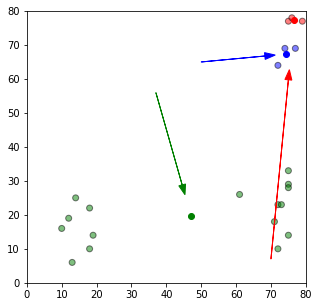

In [51]:
kmdf = pd.DataFrame ({
    'x' : [12,10,18,18,19,13,14,75,75,72,61,72,75,73,75,71,74,79,72,75,76,77],
    'y' : [19,16,10,22,14,6,25,29,33,10,26,23,28,23,14,18,69,77,64,77,78,69]
})

np.random.seed(40)

k = 3
centroids = { 
i+1: [np.random.randint(0,80),np.random.randint(0,80)] for i in range(k)
}

print(centroids)

def assignment(kmdf,centroids):
    for i in centroids.keys():
        kmdf['distance_from_{}'.format(i)] = (
            np.sqrt(
                (kmdf['x'] - centroids[i][0]) ** 2 + (kmdf['y'] - centroids[i][0]) ** 2 
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    print(centroid_distance_cols)
    kmdf['closest'] =  kmdf.loc[:,centroid_distance_cols].idxmin(axis=1)
    #print(kmdf.head())
    #print(kmdf['closest'])
    kmdf['closest'] = kmdf['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    kmdf['color'] = kmdf['closest'].map(lambda x: colmap[x])
    return kmdf
print(centroids)
colmap = { 1:'r', 2:'g', 3: 'b', 4:'y'}
kmdf =assignment(kmdf,centroids)
print(kmdf)

import copy
old_centroids = copy.deepcopy(centroids)

print(old_centroids)

def update(k):
    print("before update")
    print(k)
    for i in k.keys():
        k[i][0] = np.mean(kmdf[kmdf['closest'] == i]['x'])
        k[i][1] = np.mean(kmdf[kmdf['closest'] == i]['y'])
    print("after update")
    print(k)
    return k
#centroids = update(centroids)
#print(centroids)

while True:
    closest_centroids = kmdf['closest'].copy(deep=True)
    centroids = update(centroids)
    print(closest_centroids)
    kmdf = assignment(kmdf,centroids)
    if closest_centroids.equals(kmdf['closest']):
        break
    

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(kmdf['x'],kmdf['y'],color =kmdf['color'], alpha = 0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = ( centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = ( centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x,old_y, dx,dy, head_width = 2 , head_length = 3, fc=colmap[i], ec=colmap[i])

plt.show()


   


### KMeans using sklearn :

In [52]:
kmdf = pd.DataFrame ({
    'x' : [12,10,18,18,19,13,14,75,75,72,61,72,75,73,75,71,74,79,72,75,76,77],
    'y' : [19,16,10,22,14,6,25,29,33,10,26,23,28,23,14,18,69,77,64,77,78,69]
})

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(kmdf)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
labels =kmeans.predict(kmdf)
centroids = kmeans.cluster_centers_


[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
['g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b']


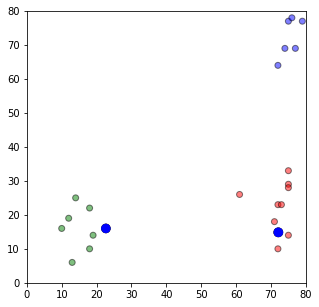

In [54]:
print(labels)
colors = map(lambda x: colmap[x+1],labels)
colors1 = list(colors)
print(colors1)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(kmdf['x'],kmdf['y'],color =colors1, alpha = 0.5, edgecolor='k')

for idx,centroid in enumerate(centroids):
    plt.scatter(*centroids ,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [55]:
#m1 = folium.Map(Location=[48.2,16.3], zoom_start =4)
#m1

In [56]:
from sklearn.cluster import KMeans

In [57]:
X = pd.get_dummies(data[['Total Cost', 'SC Vehicle Manufacturer Name']].dropna())

In [58]:
X.head()

,Total Cost,SC Vehicle Manufacturer Name_ACURA,SC Vehicle Manufacturer Name_ALFA ROMEO,SC Vehicle Manufacturer Name_AMERICAN AUSTIN,SC Vehicle Manufacturer Name_APRILIA,SC Vehicle Manufacturer Name_AUDI,SC Vehicle Manufacturer Name_AUSTIN HEALEY,SC Vehicle Manufacturer Name_Audi,SC Vehicle Manufacturer Name_BICYCLE,SC Vehicle Manufacturer Name_BMW,...,SC Vehicle Manufacturer Name_TOYOTA,SC Vehicle Manufacturer Name_TRIUMPH,SC Vehicle Manufacturer Name_Toyota,SC Vehicle Manufacturer Name_UNK,SC Vehicle Manufacturer Name_VOLKSWAGEN,SC Vehicle Manufacturer Name_VOLKSWAGON,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_Volkswagen,SC Vehicle Manufacturer Name_Volvo,SC Vehicle Manufacturer Name_nissan
1,32.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,30.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,53.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [140]:
kmeans = KMeans(n_clusters = 2)

In [141]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
X['Label'] = kmeans.labels_

In [147]:
X.head()

,Total Cost,SC Vehicle Manufacturer Name_ACURA,SC Vehicle Manufacturer Name_ALFA ROMEO,SC Vehicle Manufacturer Name_AMERICAN AUSTIN,SC Vehicle Manufacturer Name_APRILIA,SC Vehicle Manufacturer Name_AUDI,SC Vehicle Manufacturer Name_AUSTIN HEALEY,SC Vehicle Manufacturer Name_Audi,SC Vehicle Manufacturer Name_BICYCLE,SC Vehicle Manufacturer Name_BMW,...,SC Vehicle Manufacturer Name_TRIUMPH,SC Vehicle Manufacturer Name_Toyota,SC Vehicle Manufacturer Name_UNK,SC Vehicle Manufacturer Name_VOLKSWAGEN,SC Vehicle Manufacturer Name_VOLKSWAGON,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_Volkswagen,SC Vehicle Manufacturer Name_Volvo,SC Vehicle Manufacturer Name_nissan,Label
1,32.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,53.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
X.groupby('Label').mean()

,Total Cost,SC Vehicle Manufacturer Name_ACURA,SC Vehicle Manufacturer Name_ALFA ROMEO,SC Vehicle Manufacturer Name_AMERICAN AUSTIN,SC Vehicle Manufacturer Name_APRILIA,SC Vehicle Manufacturer Name_AUDI,SC Vehicle Manufacturer Name_AUSTIN HEALEY,SC Vehicle Manufacturer Name_Audi,SC Vehicle Manufacturer Name_BICYCLE,SC Vehicle Manufacturer Name_BMW,...,SC Vehicle Manufacturer Name_TOYOTA,SC Vehicle Manufacturer Name_TRIUMPH,SC Vehicle Manufacturer Name_Toyota,SC Vehicle Manufacturer Name_UNK,SC Vehicle Manufacturer Name_VOLKSWAGEN,SC Vehicle Manufacturer Name_VOLKSWAGON,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_Volkswagen,SC Vehicle Manufacturer Name_Volvo,SC Vehicle Manufacturer Name_nissan
Label,,,,,,,,,,,,,,,,,,,,,
0,46.569276,0.011762,0.001004,0.000072,0.000072,0.004805,0.000072,0.000072,0.00043,0.012264,...,0.163953,0.000072,0.000072,0.000072,0.025533,0.000143,0.024242,0.000143,0.000072,0.000072
1,9869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [145]:
X.groupby('Label').mean().iloc[1].sort_values()
#X.groupby('Label').mean()

SC Vehicle Manufacturer Name_JEEP                  0.0
SC Vehicle Manufacturer Name_PATHFINDER            0.0
SC Vehicle Manufacturer Name_OLDSMOBILE            0.0
SC Vehicle Manufacturer Name_Nissan                0.0
SC Vehicle Manufacturer Name_NISSAN                0.0
                                                 ...  
SC Vehicle Manufacturer Name_FORD                  0.0
SC Vehicle Manufacturer Name_FLINT                 0.0
SC Vehicle Manufacturer Name_HHKHKJHKJHKJHKJ       0.0
SC Vehicle Manufacturer Name_HONDA                 1.0
Total Cost                                      9869.0
Name: 1, Length: 87, dtype: float64

In [146]:
X.groupby('Label').mean().iloc[0].sort_values()

SC Vehicle Manufacturer Name_nissan              0.000072
SC Vehicle Manufacturer Name_HHKHKJHKJHKJHKJ     0.000072
SC Vehicle Manufacturer Name_HINO                0.000072
SC Vehicle Manufacturer Name_HUNDAI              0.000072
SC Vehicle Manufacturer Name_UNK                 0.000072
                                                  ...    
SC Vehicle Manufacturer Name_CHEVROLET           0.066915
SC Vehicle Manufacturer Name_HONDA               0.107007
SC Vehicle Manufacturer Name_FORD                0.112888
SC Vehicle Manufacturer Name_TOYOTA              0.163953
Total Cost                                      46.569276
Name: 0, Length: 87, dtype: float64

In [149]:
#X.groupby('Label').mean().iloc[2].sort_values()

In [150]:
#X.groupby('Label').mean().iloc[3].sort_values()

In [65]:
data['FSV Mortgage Flag'].value_counts()

N    21317
Y       27
Name: FSV Mortgage Flag, dtype: int64

In [185]:
res = data.groupby('SC Vehicle Manufacturer Name').agg({'Total Cost': ['sum','count','mean']})

In [186]:
res.columns

MultiIndex([('Total Cost',   'sum'),
            ('Total Cost', 'count'),
            ('Total Cost',  'mean')],
           )

In [187]:
res.sort_values(by = [('Total Cost', 'sum')], ascending=False)

Total Cost                 
                                    sum count       mean
SC Vehicle Manufacturer Name                            
TOYOTA                        107688.66  2286  47.107900
FORD                           74446.37  1574  47.297567
HONDA                          73544.41  1493  49.259484
CHEVROLET                      41628.97   933  44.618403
NISSAN                         34854.75   776  44.915915
...                                 ...   ...        ...
MECURY                            29.00     1  29.000000
FLINT                             29.00     1  29.000000
HINO                              29.00     1  29.000000
AMERICAN AUSTIN                   27.00     1  27.000000
HHKHKJHKJHKJHKJ                    0.00     1   0.000000

[86 rows x 3 columns]

In [184]:
#res[:,:]

In [155]:
data['SC Vehicle Manufacturer Name'].value_counts()

TOYOTA             2289
FORD               1580
HONDA              1494
CHEVROLET           935
NISSAN              780
                   ... 
PATHFINDER            1
Subaru                1
UNK                   1
APRILIA               1
AMERICAN AUSTIN       1
Name: SC Vehicle Manufacturer Name, Length: 86, dtype: int64

In [66]:
data.to_csv(r'member_sample_step_01.csv', index = False)